# Tree Classifier
Welcome to the tree classifier notebook!

In [1]:
#These are the needed modules

import sys
#change these paths to where they are located on your computer
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/Actual Trees")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import Atree
import math
%matplotlib inline

## Getting the data
Get the data and reformat it for easier use.

In [2]:
# IF THIS IS YOUR FIRST TIME RUNNING TREE CLASSIFIER, UNCOMMENT THESE 2 LINES. ELSE, LEAVE THEM COMMENTED



# tree_data = Atree.data_util.pandas_non_missing()
# pickle.dump(tree_data, open('.././trees/tree_data.csv', 'wb'))

In [3]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [4]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

## Convert the data into a usable format
Organize the data into the format needed to preform classification

In [5]:
"""

FUNCTION
--------
splitTrees is used to quickly and efficiently split the data into usable chunks


PARAMETERS
----------
location - the name of the location where the tree is from, matches exactly with the trees dataset, and is a string


RETURNS
-------
splitTrees returns 2 lists of equal size that contain proper training and testing data

"""

def splitTrees(location) :
    ind = np.where(trees['location']==location)[0]
    
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,totalTrees-1,totalTrees)
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        train[i] = neuron.getNeuronVector()
    
    print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        test[i] = neuron.getNeuronVector()
        
    print('done')
    return train,test

In [10]:
totalTrees = 20
size = int(totalTrees/2)

trainG, testG = splitTrees('Gabon')
trainH, testH = splitTrees('Ghana')
trainU, testU = splitTrees('UK')
trainW, testW = splitTrees('Wytham Meteoc (UK)')

half
done
half
done
half
done
half
done


## Classification
Use the data to train a classifier, and then test its accuracy

In [11]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [12]:
"""

FUNCTION
--------
subsetData is used to split the data into lists with only 1 classifying feature in order to test how 
important each feature is individually for classification


PARAMETERS
----------
arr - the master array that contains all the feautres
q - the index of the desired feature


RETURNS
-------
subsetData returns an array with only 1 classifying feature

"""

def subsetData(arr,q):
    x = [0] * size
    for i in range(0,size) :
        x[i] = arr[i][q]
    return x

In [13]:
"""
This for loop iterates through all of the feaures and prints the accuracy
"""

for q in range(0,22) :
    a = subsetData(trainG,q)
    b = subsetData(trainH,q)
    c = subsetData(trainU,q)
    d = subsetData(trainW,q)
    e = subsetData(testG,q)
    f = subsetData(testH,q)
    g = subsetData(testU,q)
    h = subsetData(testW,q)
    
    train = np.expand_dims(np.concatenate((a,b,c,d)),axis=1)
    test = np.expand_dims(np.concatenate((e,f,g,h)),axis=1)
    
    y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))
    clf = BaggingClassifier()
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 4
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
    accuracy = sum / len(z)
    print(accuracy , q)

0.425 0
0.55 1
0.575 2
0.25 3
0.25 4
0.25 5
0.475 6
0.25 7
0.25 8
0.275 9
0.35 10
0.475 11
0.55 12
0.725 13
0.65 14
0.525 15
0.65 16
0.65 17
0.6 18
0.325 19
0.525 20
0.525 21


In [14]:
"""
Convert the lists into numpy arrays and concatenate them to create 1 big test and train array
"""

trainG = np.vstack(trainG)
trainH = np.vstack(trainH)
trainU = np.vstack(trainU)
trainW = np.vstack(trainW)
testG = np.vstack(testG)
testH = np.vstack(testH)
testU = np.vstack(testU)
testW = np.vstack(testW)


train = np.concatenate((trainG,trainH,trainU,trainW))
test = np.concatenate((testG,testH,testU,testW))
y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))

In [15]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
clf = BaggingClassifier(DecisionTreeClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [16]:
"""
Train the classifier and print the accuracy
"""

clf.fit(train,y)
z = clf.predict(test)

sum = 0
parts = 4
for i in range (0,parts) :
    for j in range (0,size) :
        if z[j + size*i] == i :
            sum += 1
        #else :
            #print(j + size*i)
accuracy = sum / len(z)
print(sum, accuracy)

39 0.975


## Data Visualization
Plot the results and the data to get a better understanding of the classification

10
9
11
10


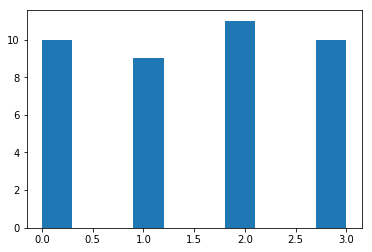

In [17]:
"""
This histogram gives you the breakdown of what the classifier predicted on the test values
"""

plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))
print(len(np.where(z == 2)[0]))
print(len(np.where(z == 3)[0]))

### TSNE
Visualize the training data using TSNE

In [18]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.001s...
[t-SNE] Computed neighbors for 40 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 5240.414678
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 46.8889732, gradient norm = 0.4032722 (50 iterations in 0.032s)
[t-SNE] Iteration 100: error = 45.6254272, gradient norm = 0.4991229 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 46.4909248, gradient norm = 0.5105765 (50 iterations in 0.026s)
[t-SNE] Iteration 200: error = 48.4899025, gradient norm = 0.5608598 (50 iterations in 0.024s)
[t-SNE] Iteration 250: error = 47.6384811, gradient norm = 0.5820786 (50 iterations in 0.023s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.638481
[t-SNE] Iteration 300: error = 0.7471344, gradient norm = 0.0011778 (50 iterations in 0.023s)
[t-SNE] Iteration 350: error = 0.5979818, gradient norm = 0.0005096 (5

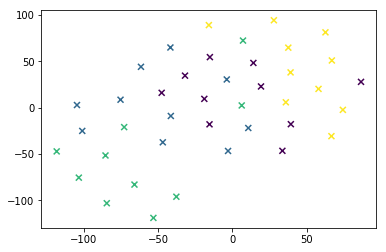

In [19]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')

### PCA
Visualize the training data using PCA

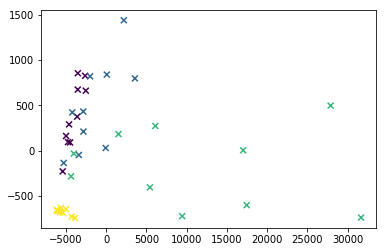

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')